**Team Name:** DataNerds

**Student Details:**

--------------------------

Name : Reshma Vijay Jawale

Student Id : A0236581B

--------------------------
Name : Aiden Low Yew Woei

Student Id : A0121969W

--------------------------
Name : Raivat Bhupesh Shah 

Student Id : A0184879A

--------------------------

# EDA 

This notebook constitutes our exploratory data analysis. It is also the notebook used for generating the plots that are included in our report.

## Setting up the notebook

In [678]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [680]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from typing import List
from plotly.subplots import make_subplots
import seaborn as sns
from numpy import median
import pandas as pd
import re
from matplotlib.ticker import StrMethodFormatter

In [681]:
df_prices_train = pd.read_csv("train.csv")
print("Property Prices train dataset", df_prices_train.shape)
display(df_prices_train.head())

Property Prices train dataset (26048, 23)


,listing_id,name,street,type,model,market_segment,type_of_area,bedrooms,bathrooms,district,...,lat,lng,tenure,built_year,no_of_units,area_size,eco_category,accessibility,date_listed,price
0,6998418,seascape,57 cove way,condominium,condominium,ocr,strata,3,4.0,4,...,1.239337,103.837487,leasehold/99 years,2011.0,151.0,2336.0,uncategorized,guarded,2021-05-04,5390000.0
1,2046604,la maison,10 moulmein rise,apartment,apartment,ocr,strata,3,3.0,11,...,1.319533,103.847030,freehold,1999.0,24.0,1259.0,uncategorized,guarded,2021-05-07,2310000.0
2,7563513,viva,2 suffolk walk,condominium,condominium,ocr,strata,4,3.0,11,...,1.315656,103.844445,freehold,2012.0,235.0,1959.0,uncategorized,guarded,2021-06-30,5279500.0
3,3071445,urban treasures,205 jalan eunos,condominium,condominium,ocr,strata,3,2.0,14,...,1.329367,103.905791,freehold,NaN,237.0,883.0,uncategorized,guarded,2022-01-02,1843600.0
4,9667539,infini at east coast,east coast road,apartment,apartment,ocr,strata,3,3.0,15,...,1.309176,103.911352,freehold,NaN,36.0,1066.0,uncategorized,guarded,2021-12-24,2262700.0


In [682]:
df_prices_train.shape

(26048, 23)

Our dataset consists of 26048 rows and 12 columns

In [683]:
df_prices_train.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,26048.0,5.495573e+06,2.608064e+06,1.000122e+06,3.229224e+06,5.486808e+06,7.764926e+06,9.999807e+06
bathrooms,24812.0,2.278091e+00,1.147204e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
district,26048.0,1.221161e+01,7.020134e+00,1.000000e+00,7.000000e+00,1.100000e+01,1.800000e+01,2.800000e+01
lat,26048.0,1.321145e+00,3.856868e-02,1.239337e+00,1.296472e+00,1.313384e+00,1.341210e+00,1.456436e+00
lng,26048.0,1.038461e+02,4.986499e-02,1.036962e+02,1.038203e+02,1.038431e+02,1.038797e+02,1.039760e+02
built_year,16005.0,2.010926e+03,1.191588e+01,1.799000e+03,2.010000e+03,2.014000e+03,2.016000e+03,2.021000e+03
no_of_units,25006.0,4.623506e+02,4.234763e+02,1.000000e+00,1.300000e+02,3.660000e+02,6.460000e+02,2.203000e+03
area_size,26046.0,1.248902e+03,1.066102e+03,2.260000e+02,6.780000e+02,9.580000e+02,1.356000e+03,1.500000e+04
price,26048.0,2.994669e+06,4.324294e+06,5.566000e+05,1.331000e+06,1.851800e+06,2.948000e+06,7.480000e+07


In [684]:
df_prices_train.skew()

C:\Users\Reshma Jawale\AppData\Local\Temp/ipykernel_19696/2105974926.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



listing_id     0.003679
bathrooms      1.035077
district       0.282390
lat            0.887747
lng            0.140922
built_year    -5.275309
no_of_units    1.540912
area_size      4.242539
price          7.801323
dtype: float64

area_size and price are highly positively right skewed, all other features are right skewed.

In [685]:
df_prices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   listing_id      26048 non-null  int64  
 1   name            26048 non-null  object 
 2   street          26048 non-null  object 
 3   type            26048 non-null  object 
 4   model           24768 non-null  object 
 5   market_segment  26048 non-null  object 
 6   type_of_area    26048 non-null  object 
 7   bedrooms        25644 non-null  object 
 8   bathrooms       24812 non-null  float64
 9   district        26048 non-null  int64  
 10  region          26048 non-null  object 
 11  planning_area   26048 non-null  object 
 12  subszone        26048 non-null  object 
 13  lat             26048 non-null  float64
 14  lng             26048 non-null  float64
 15  tenure          25761 non-null  object 
 16  built_year      16005 non-null  float64
 17  no_of_units     25006 non-null 

The above information tells us

Our dataset features consists of three datatypes

-float

-integer

-object

Of which total numerical features are 9
And categorical features are 13.

Also we don't have complete data for all of our features

In [686]:
df_prices_train.isnull().sum()

listing_id            0
name                  0
street                0
type                  0
model              1280
market_segment        0
type_of_area          0
bedrooms            404
bathrooms          1236
district              0
region                0
planning_area         0
subszone              0
lat                   0
lng                   0
tenure              287
built_year        10043
no_of_units        1042
area_size             2
eco_category          0
accessibility         0
date_listed           0
price                 0
dtype: int64

## Read Data and Visualise missing values per row

Text(0.5, 1.0, 'Count missing data by feature')

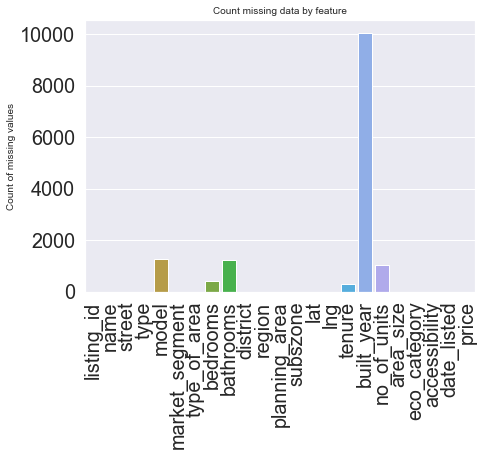

In [687]:
f, ax = plt.subplots(figsize=(7, 5))
plt.xticks(rotation='90')
sns.barplot(x=df_prices_train.isnull().sum().index, y=df_prices_train.isnull().sum())
#plt.xlabel('Features', fontsize=15)
plt.ylabel('Count of missing values', fontsize=10)
plt.title('Count missing data by feature', fontsize=10)

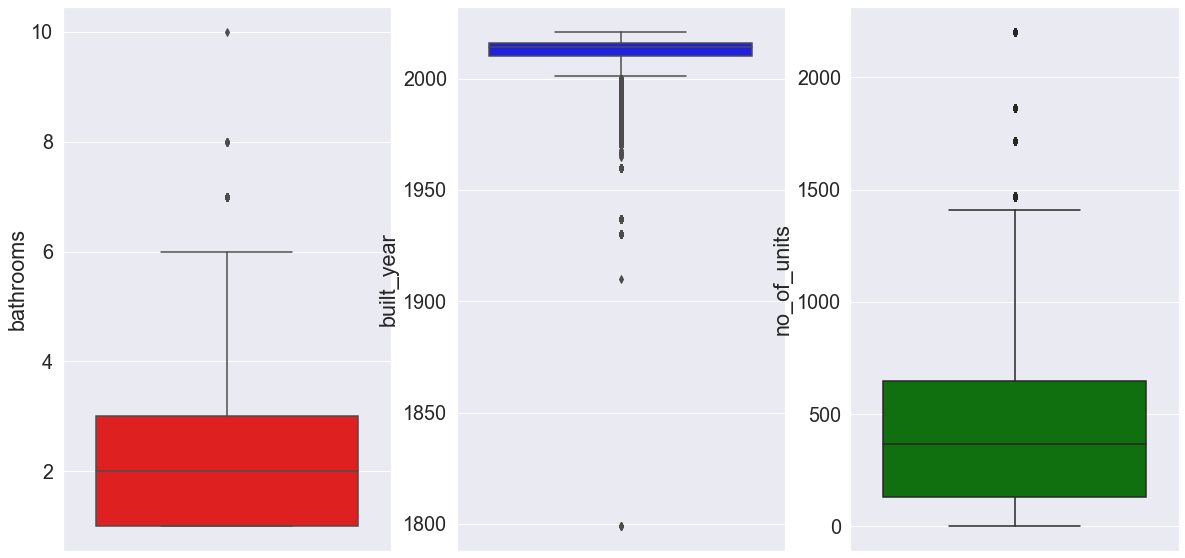

In [688]:
plt.figure(figsize=(20,10))

features_to_examine = ['bathrooms','built_year','no_of_units']
temp = df_prices_train[features_to_examine]
colors=['','red','blue','green']
i=1
for col in temp.columns:
    plt.subplot(1,3,i)
    a1 = sns.boxplot(data=temp,y=col,color=colors[i])
    i+=1

Text(0, 0.5, 'Latitude')

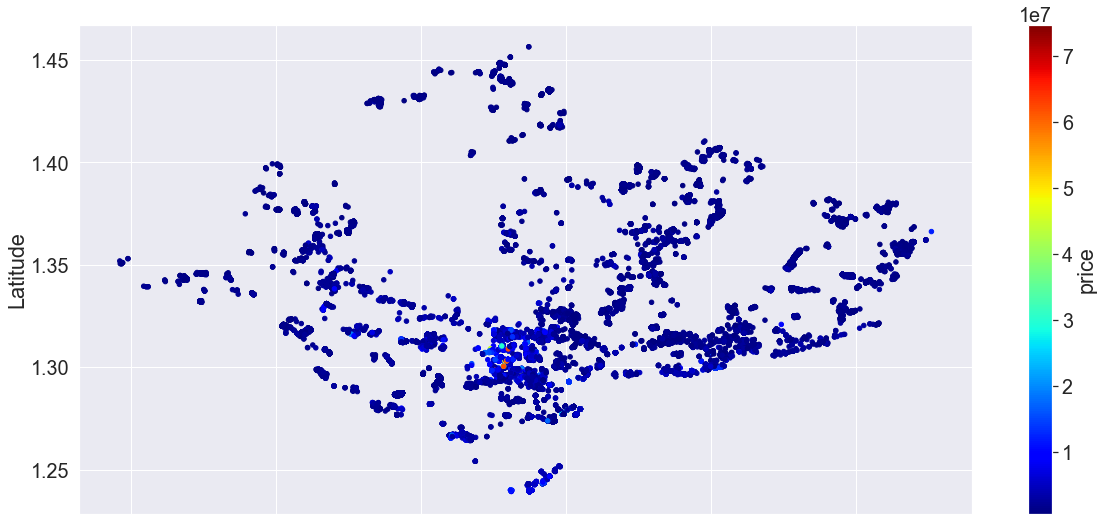

In [689]:
# Price Distribution Graph

ax=df_prices_train.plot(kind='scatter',x='lng',y='lat',figsize=(20,9),c='price',cmap=plt.get_cmap('jet'),colorbar=True)
plt.xticks(rotation=0, size = 35)
#plt.xlabel("Longitude", fontsize=10)
#plt.ylabel("Latitude", fontsize=10)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

## Feature Analysis

In [690]:
df_new['region'] = df_new['region'].replace({'central region':1, 'east region':2, 'north region':3,'north-east region':4,'west region':5})

Text(0, 0.5, 'Latitude')

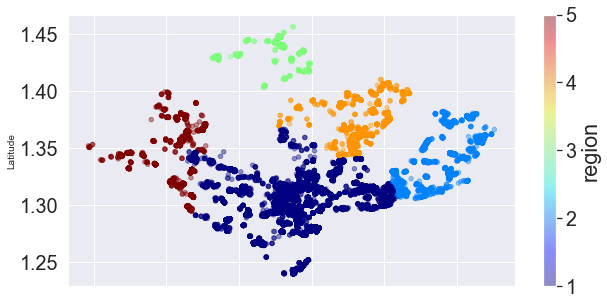

In [691]:
# Region wise data distribution graph

ax=df_new.plot(kind='scatter',x='lng',y='lat',figsize=(10,5),c='region',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
plt.xticks(rotation=0, size = 35)
plt.xlabel("Longitude", fontsize=10)
plt.ylabel("Latitude", fontsize=10)

C:\Users\Reshma Jawale\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



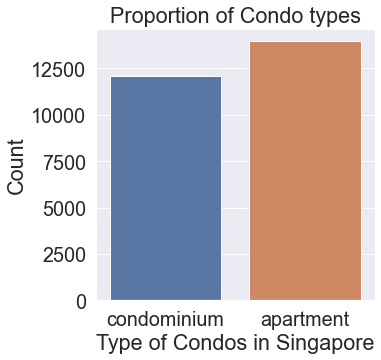

In [692]:
plt.figure(figsize=(5,5))
sns.countplot('type',data=df_prices_train)
plt.xlabel("Type of Condos in Singapore")
plt.ylabel('Count')
plt.title('Proportion of Condo types')
plt.show()

## Target Variable

Sale Price

In [693]:
df_prices_train['price'].describe()

count    2.604800e+04
mean     2.994669e+06
std      4.324294e+06
min      5.566000e+05
25%      1.331000e+06
50%      1.851800e+06
75%      2.948000e+06
max      7.480000e+07
Name: price, dtype: float64

In [714]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=df_prices_train['price']),row=1,col=1)
fig.add_trace(go.Box(y=df_prices_train['price'],boxpoints='all',line_color='orange'),row=1,col=2)

fig.update_layout(height=500, showlegend=False,title_text="Sale Price Distribution and Box Plot")

Sale Price has a right skewed distribution.
The median sale price of our dataset is 8.518M which is less than the average value i.e because of right skewed distribution.
We can see some of the condos even have sale price more than 40M

## Data Cleaning

Removing unwanted columns from data

In [696]:
# Columns to ignore
TO_IGNORE = [
    "subszone",
    "street", # we simply go by lat and long
    "listing_id",
    "name",
    "model", # we drop this because type is more than enough.
    "market_segment", # Only one value, ocr.
    "type_of_area", # Only one value, strata.
    "eco_category", # only one value, uncategorized.
    "accessibility", # only one value, guarded.
    "date_listed", # Redundant information,
    "built_year" # drop as there's too many missing cols, 10043
]

In [697]:
df_prices_train = df_prices_train.drop(columns=TO_IGNORE)

In [698]:
df_prices_train

,type,bedrooms,bathrooms,district,region,planning_area,lat,lng,tenure,no_of_units,area_size,price
0,condominium,3,4.0,4,central region,southern islands,1.239337,103.837487,leasehold/99 years,151.0,2336.0,5390000.0
1,apartment,3,3.0,11,central region,novena,1.319533,103.847030,freehold,24.0,1259.0,2310000.0
2,condominium,4,3.0,11,central region,novena,1.315656,103.844445,freehold,235.0,1959.0,5279500.0
3,condominium,3,2.0,14,east region,bedok,1.329367,103.905791,freehold,237.0,883.0,1843600.0
4,apartment,3,3.0,15,east region,bedok,1.309176,103.911352,freehold,36.0,1066.0,2262700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26043,condominium,3,3.0,8,central region,kallang,1.308896,103.863069,leasehold/99 years,600.0,1442.0,2750000.0
26044,condominium,3,3.0,10,central region,tanglin,1.316263,103.825190,freehold,17.0,1561.0,6449300.0
26045,condominium,2,2.0,18,east region,tampines,1.341303,103.953348,leasehold/99 years,301.0,883.0,1306800.0
26046,condominium,4,3.0,22,west region,jurong east,1.335557,103.742417,leasehold/99 years,738.0,1206.0,2420000.0


## Correlation-related plots

In [699]:
df_prices_train.corr()

,bathrooms,district,lat,lng,no_of_units,area_size,price
bathrooms,1.000000,-0.064970,-0.083864,-0.019363,-0.052380,0.738501,0.577072
district,-0.064970,1.000000,0.873757,0.144586,-0.075181,-0.170452,-0.219530
lat,-0.083864,0.873757,1.000000,0.136575,0.039133,-0.191119,-0.233966
lng,-0.019363,0.144586,0.136575,1.000000,-0.032089,-0.044925,-0.066026
no_of_units,-0.052380,-0.075181,0.039133,-0.032089,1.000000,-0.058612,-0.100886
area_size,0.738501,-0.170452,-0.191119,-0.044925,-0.058612,1.000000,0.869712
price,0.577072,-0.219530,-0.233966,-0.066026,-0.100886,0.869712,1.000000


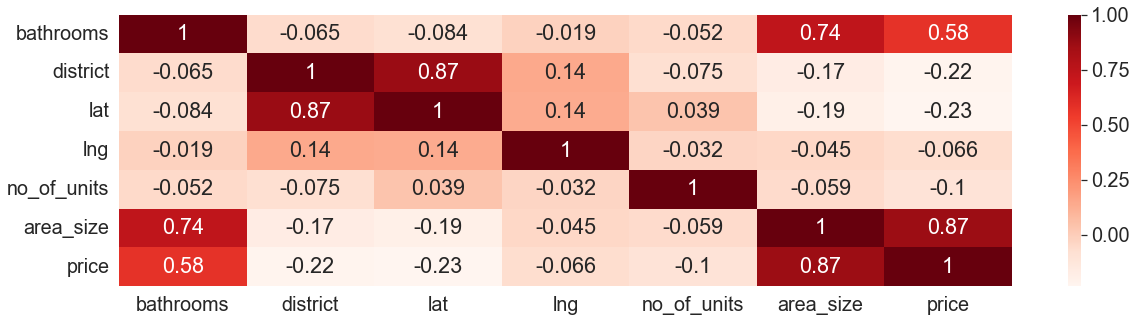

In [700]:
corr = df_prices_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
#sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()
plt.figure(figsize=(20,5))
sns.heatmap(corr, cmap="Reds",annot=True)
plt.show()

In [701]:
# create correlation matrix with abs values
#corr_matrix = df_prices_train.corr().abs()
# change this value as needed, if 0.5 does not work for your scenario
#threshold = 0.5
#filtered_corr_df = corr_matrix[(corr_matrix >= threshold) & (corr_matrix != 1.000)] 
#plt.figure(figsize=(18,5))
#sns.heatmap(filtered_corr_df, annot=True, cmap="Reds")
#plt.show()

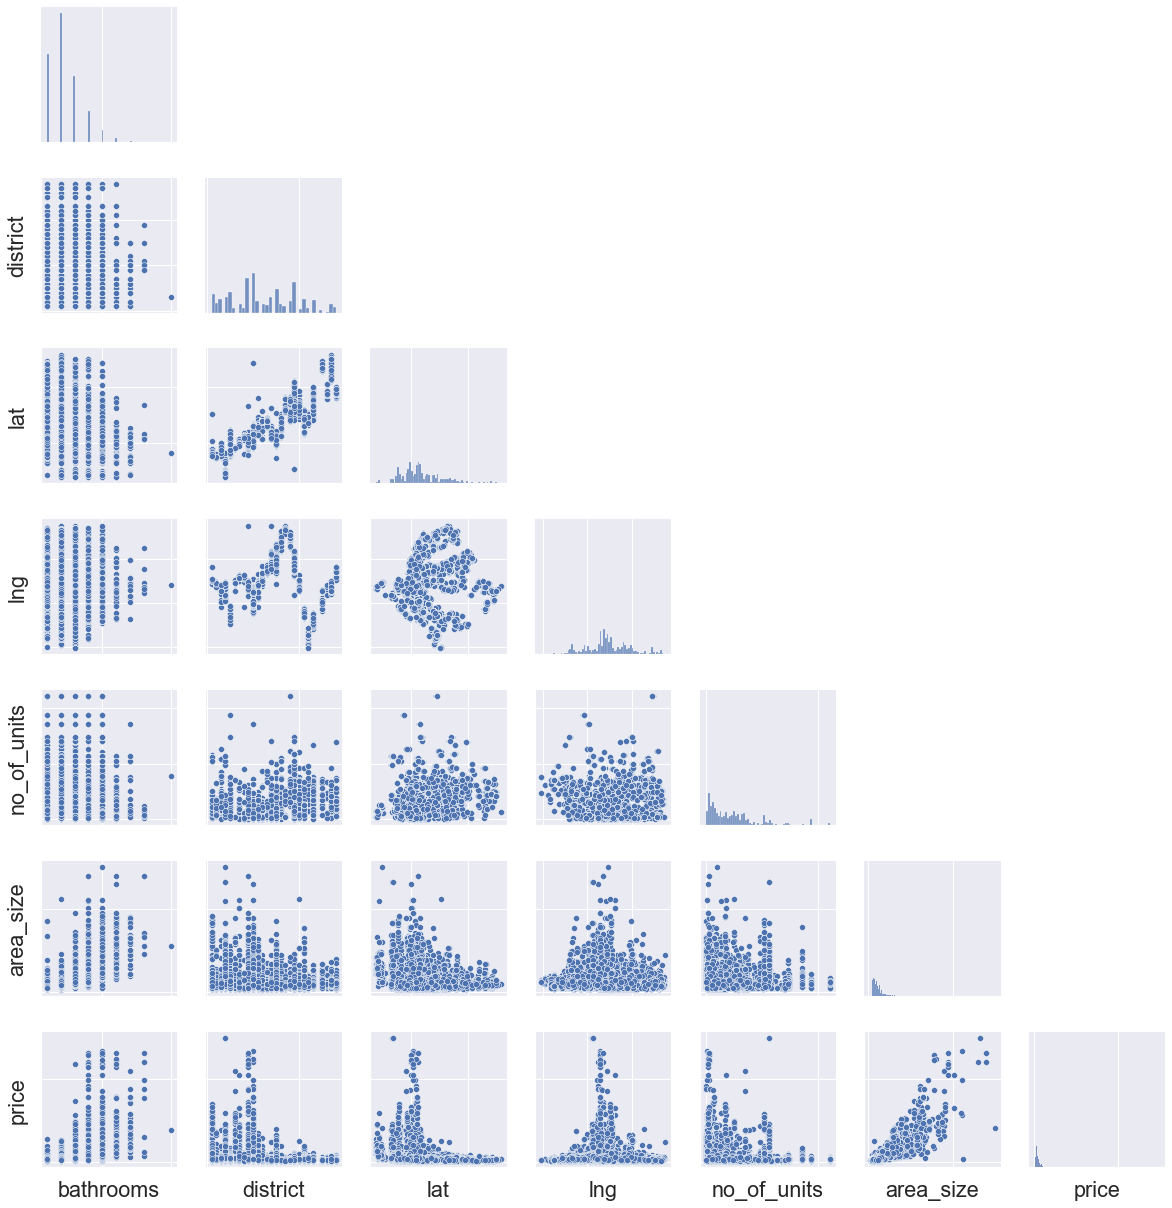

In [702]:
sns.set(font_scale=1.8)
matplotlib.rcParams['figure.figsize'] = (10, 10)
pp = sns.pairplot(df_prices_train, corner=True)

for ax in pp.axes.flat:
    if ax:
        ax.set_yticklabels([])
        ax.set_xticklabels([])

plt.show()

In [703]:
df_1 = df_prices_train.copy()

In [704]:
def process_bedroom_sum(expr) -> int:
    """
    Cleans the bedroom column by summing up + values.
    """
    if pd.isna(expr):
        return expr
    if str(expr) == '10+':
        return 10
    return eval(str(expr))


def process_bedroom_half(expr) -> int:
    if (type(expr) == str):
        if (len(expr) == 1):
            return int(expr)
        elif (len(expr) > 1):
            # assuming all values are of the type operand_1 + operand_2
            op_1, op_2 = int(expr[0]), int(expr[2])
            return op_1 + (op_2 / 2)
        else:
            # null value, returning NaN for completion sake
            return expr
    else:
        return expr
    
def categorical_to_onehot(df: pd.DataFrame, cols: List[str]) -> pd.DataFrame:
    one_hot = pd.get_dummies(df[cols])
    df = df.drop(columns=cols)
    df = df.join(one_hot)
    return df

def tenure_to_binary(expr: str) -> str:
    """
    Convert tenure to two one-hot columns:
        tenure_freehold: 999 years or freehold
        tenure_60: houses that are only 60 years.
        tenure_99: houses that have a 99 years leasehold.
    
    If the tenure is missing, we assume a standard 99 as that is the most frequent housing tenure model in Singapore.
    """
    if pd.isna(expr):
        return '99' # assume standard 99
    # get number of years
    res = re.search(r'(\d+)[^\d]+[yY]ears', expr)
    if res is None:
        return 'freehold'
    years = int(res.group(1))
    if years > 100:
        return 'freehold'
    elif years > 70:
        return '99'
    else:
        return '60'

In [705]:
# Then, we clean up the tenure fields to 3 categories: 60 years, 99 years, and freehold/999
df_1['tenure'] = df_1['tenure'].apply(tenure_to_binary)
df_1

,type,bedrooms,bathrooms,district,region,planning_area,lat,lng,tenure,no_of_units,area_size,price
0,condominium,3,4.0,4,central region,southern islands,1.239337,103.837487,99,151.0,2336.0,5390000.0
1,apartment,3,3.0,11,central region,novena,1.319533,103.847030,freehold,24.0,1259.0,2310000.0
2,condominium,4,3.0,11,central region,novena,1.315656,103.844445,freehold,235.0,1959.0,5279500.0
3,condominium,3,2.0,14,east region,bedok,1.329367,103.905791,freehold,237.0,883.0,1843600.0
4,apartment,3,3.0,15,east region,bedok,1.309176,103.911352,freehold,36.0,1066.0,2262700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
26043,condominium,3,3.0,8,central region,kallang,1.308896,103.863069,99,600.0,1442.0,2750000.0
26044,condominium,3,3.0,10,central region,tanglin,1.316263,103.825190,freehold,17.0,1561.0,6449300.0
26045,condominium,2,2.0,18,east region,tampines,1.341303,103.953348,99,301.0,883.0,1306800.0
26046,condominium,4,3.0,22,west region,jurong east,1.335557,103.742417,99,738.0,1206.0,2420000.0


In [706]:
df_1 = categorical_to_onehot(df_1,['tenure','region','type','planning_area'])

In [707]:
df_1

,bedrooms,bathrooms,district,lat,lng,no_of_units,area_size,price,tenure_60,tenure_99,...,planning_area_sembawang,planning_area_sengkang,planning_area_serangoon,planning_area_singapore river,planning_area_southern islands,planning_area_tampines,planning_area_tanglin,planning_area_toa payoh,planning_area_woodlands,planning_area_yishun
0,3,4.0,4,1.239337,103.837487,151.0,2336.0,5390000.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,3,3.0,11,1.319533,103.847030,24.0,1259.0,2310000.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,3.0,11,1.315656,103.844445,235.0,1959.0,5279500.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,2.0,14,1.329367,103.905791,237.0,883.0,1843600.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,3.0,15,1.309176,103.911352,36.0,1066.0,2262700.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,3,3.0,8,1.308896,103.863069,600.0,1442.0,2750000.0,0,1,...,0,0,0,0,0,0,0,0,0,0
26044,3,3.0,10,1.316263,103.825190,17.0,1561.0,6449300.0,0,0,...,0,0,0,0,0,0,1,0,0,0
26045,2,2.0,18,1.341303,103.953348,301.0,883.0,1306800.0,0,1,...,0,0,0,0,0,1,0,0,0,0
26046,4,3.0,22,1.335557,103.742417,738.0,1206.0,2420000.0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [708]:
df_1['bedrooms'] = df_1['bedrooms'].apply(process_bedroom_sum)

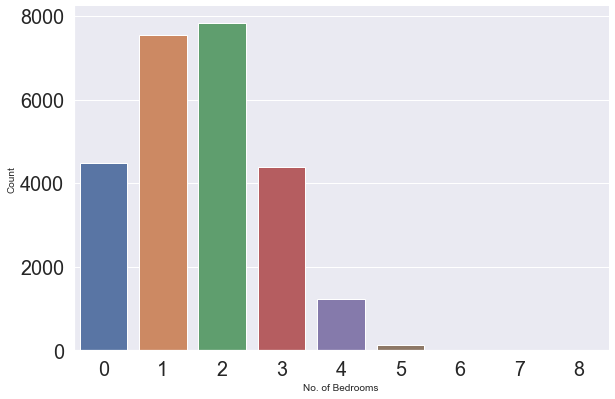

In [709]:
sns.catplot( x='bedrooms',
             kind="count", 
             data=df_1,
             height=6,
             aspect=1.5)
plt.xlabel("No. of Bedrooms", size=10)
plt.ylabel("Count", size=10)
plt.tight_layout()
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

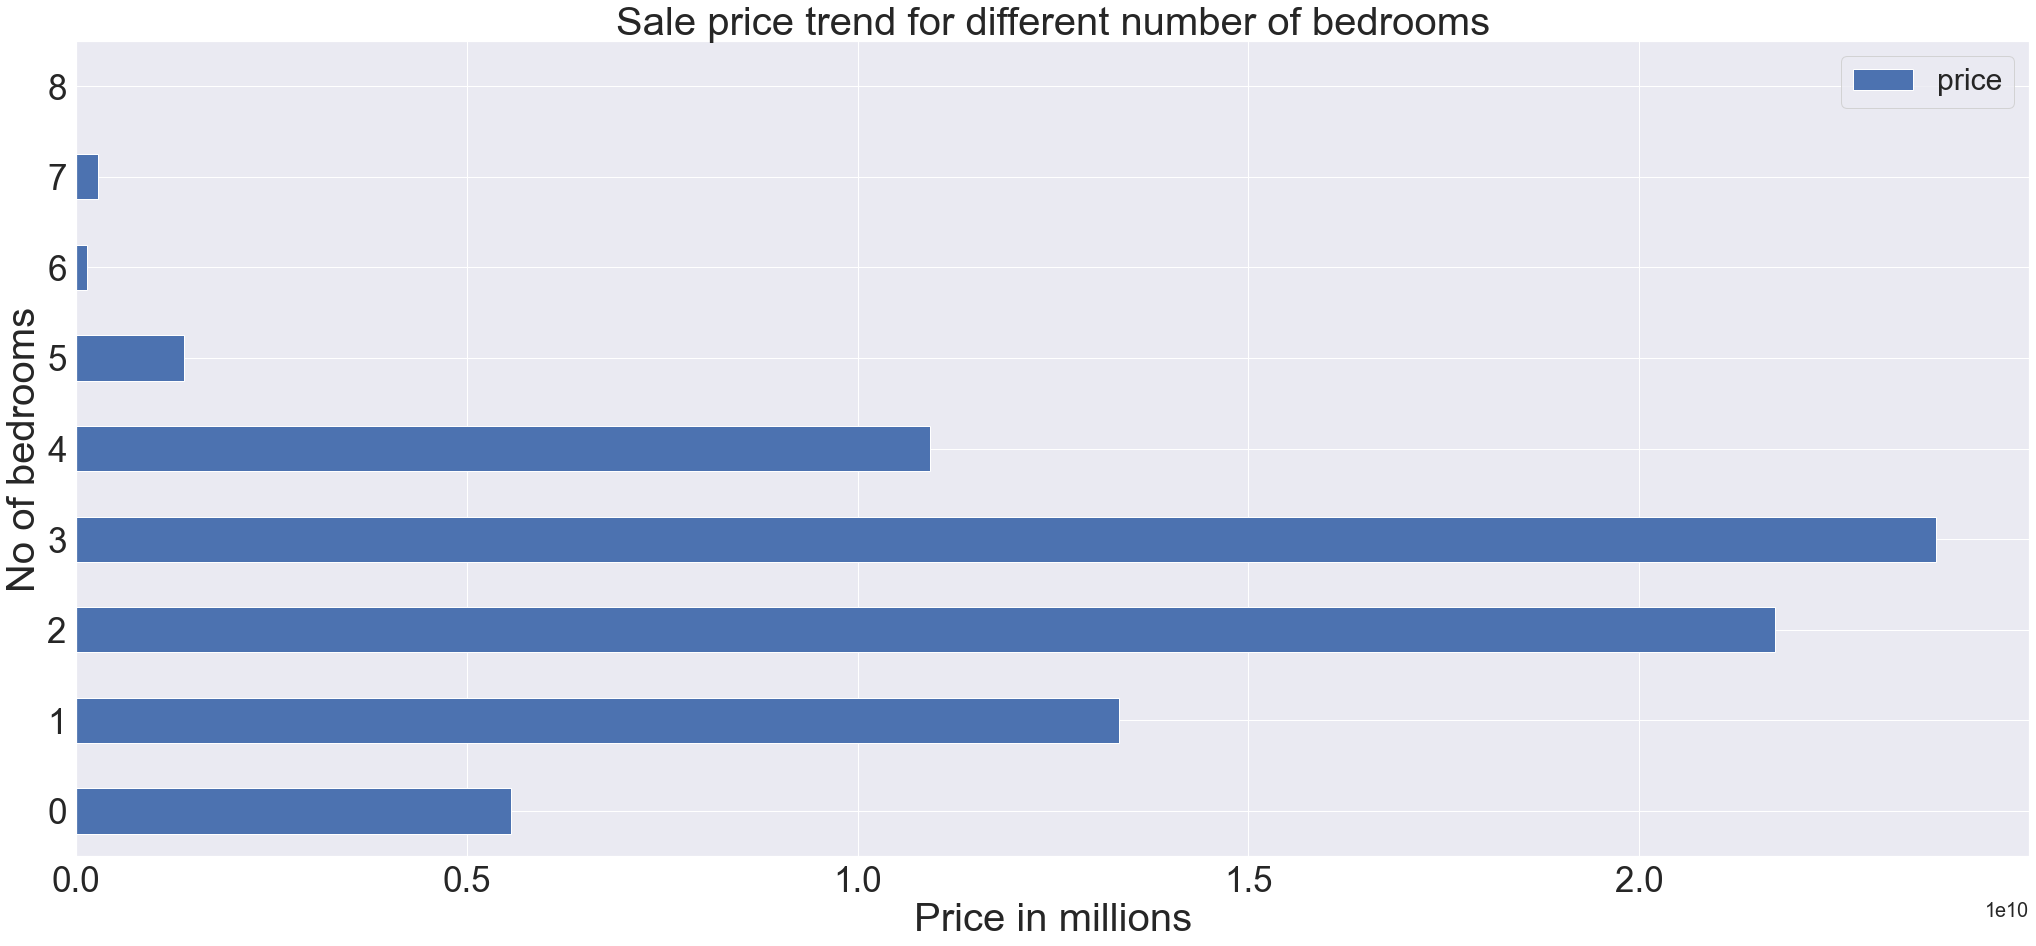

In [710]:
df1 = pd.DataFrame(df_1.groupby('bedrooms')['price'].sum())
df1.plot.barh(y='price', figsize=(35, 15), fontsize=35)
plt.xticks(rotation=0, size = 35)
plt.yticks(size = 35)
plt.legend(fontsize=30)
plt.xlabel("Price in millions", size = 40)
plt.ylabel("No of bedrooms", size = 40)
plt.title("Sale price trend for different number of bedrooms", size = 40)
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

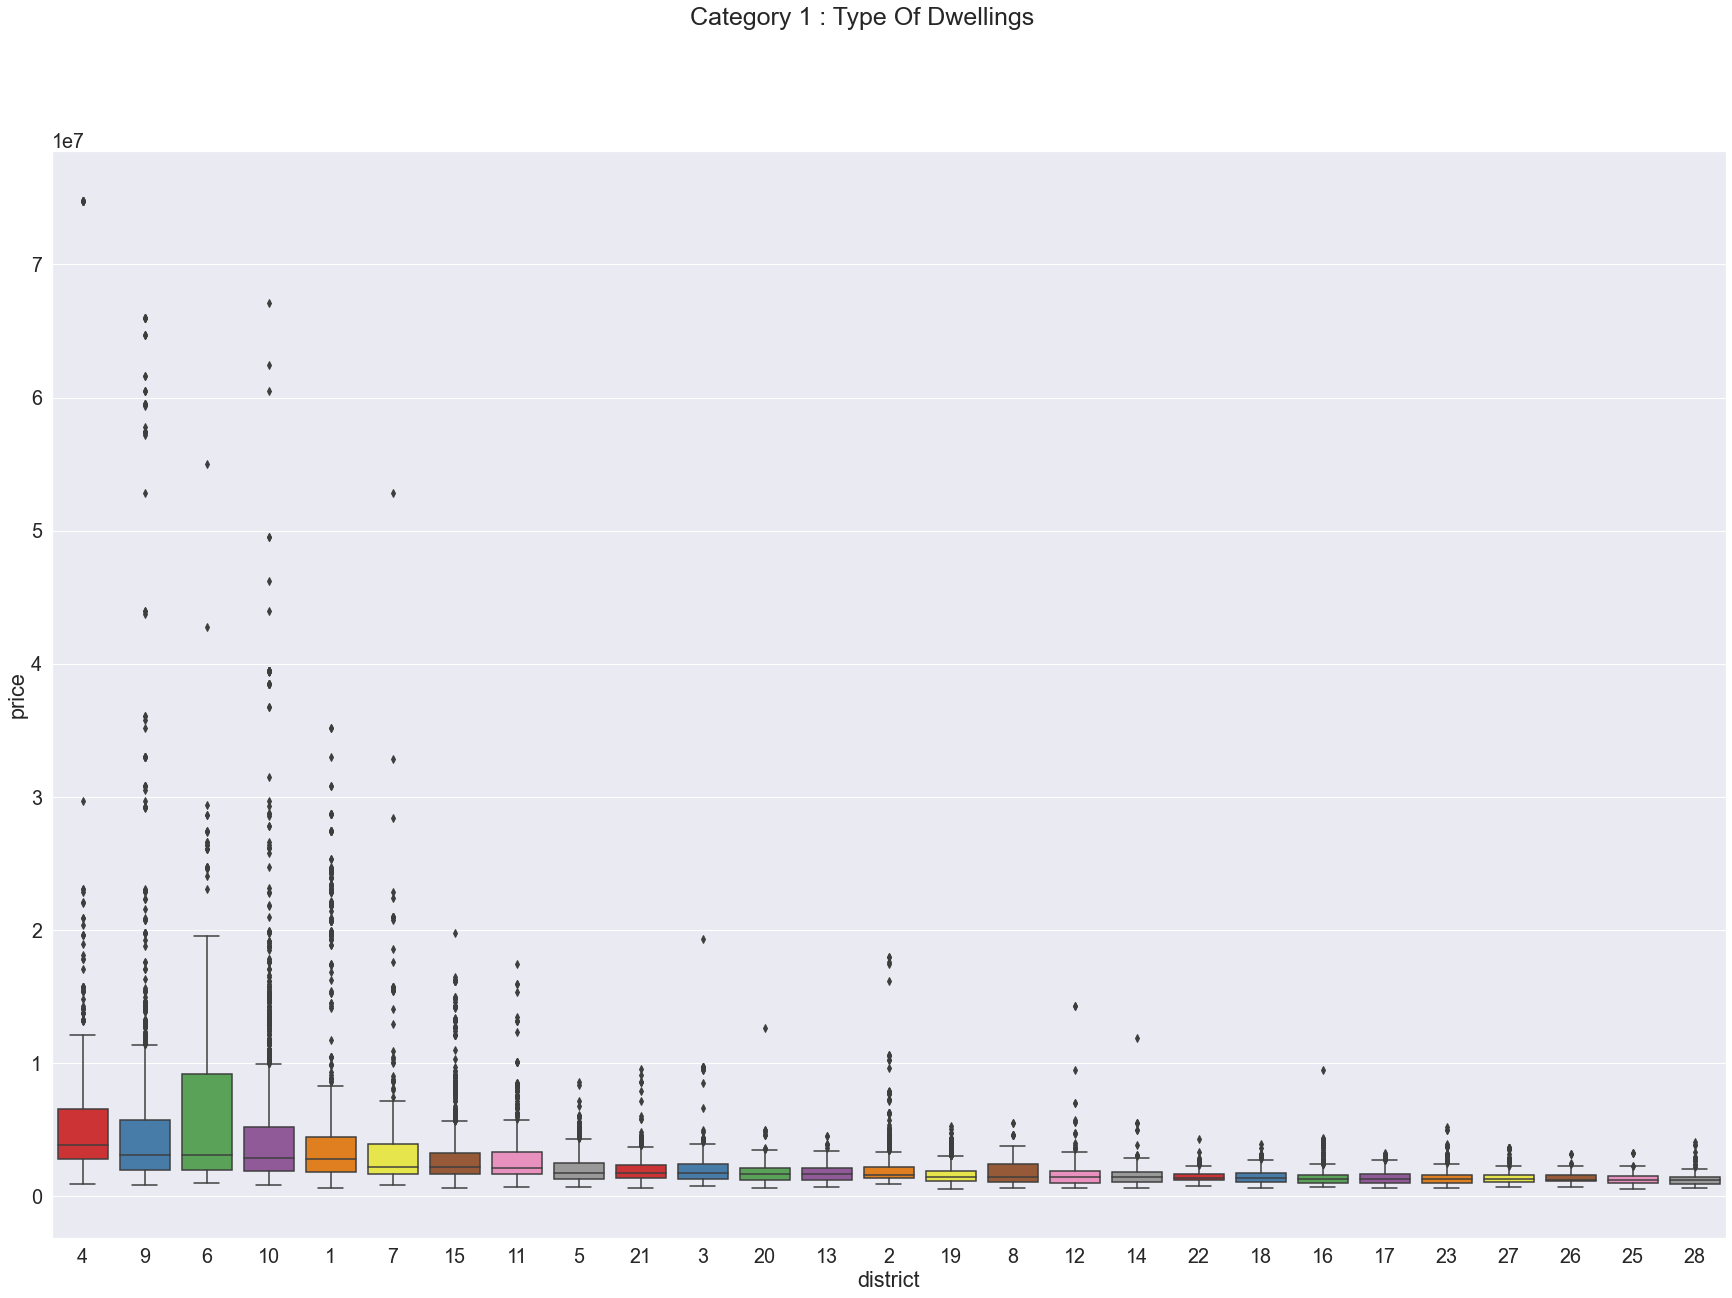

In [711]:
fig=plt.figure(figsize=(30,20))
table = df_1.groupby(['district'],as_index=False)['price'].median().sort_values(by='price',ascending=False)
ax = sns.boxplot(data=df_1,x="district",y="price",order=table['district'].to_list(),
                palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
fig.suptitle("Category 1 : Type Of Dwellings",fontsize=25);

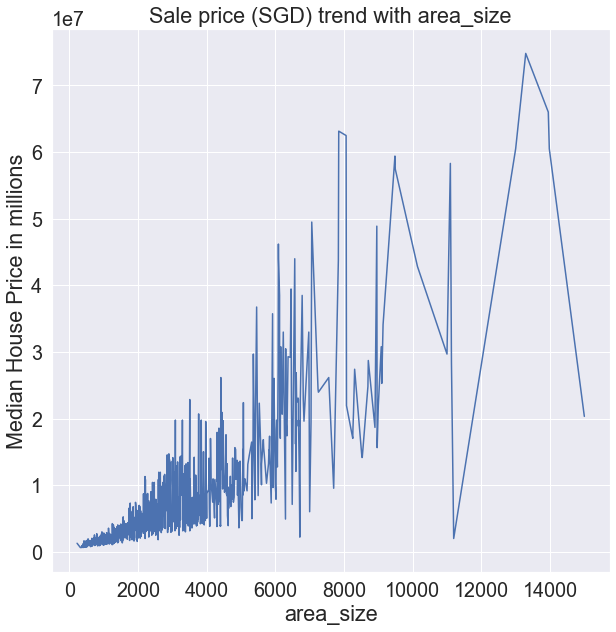

In [712]:
ax = df_1.groupby(['area_size'])['price'].median().plot()
plt.ylabel("Median House Price in millions")
plt.title("Sale price (SGD) trend with area_size")
plt.show()

In [713]:
df_1.isna().sum()

bedrooms                           404
bathrooms                         1236
district                             0
lat                                  0
lng                                  0
no_of_units                       1042
area_size                            2
price                                0
tenure_60                            0
tenure_99                            0
tenure_freehold                      0
region_central region                0
region_east region                   0
region_north region                  0
region_north-east region             0
region_west region                   0
type_apartment                       0
type_condominium                     0
planning_area_ang mo kio             0
planning_area_bedok                  0
planning_area_bishan                 0
planning_area_bukit batok            0
planning_area_bukit merah            0
planning_area_bukit panjang          0
planning_area_bukit timah            0
planning_area_changi     